In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/A_Z Handwritten Data.csv')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Splitting the Dataset**

In [ ]:
X = data.drop('0', axis = 1)
y = data['0']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print(f"Train data shape:{train_x.shape}")
print(f"Test data shape:{test_x.shape}")

Train data shape:(297960, 28, 28)
Test data shape:(74490, 28, 28)


In [ ]:
word_dict = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J',
    10:'K',
    11:'L',
    12:'M',
    13:'N',
    14:'O',
    15:'P',
    16:'Q',
    17:'R',
    18:'S',
    19:'T',
    20:'U',
    21:'V',
    22:'W',
    23:'X', 
    24:'Y',
    25:'Z'}

**Visualizing the dataset**

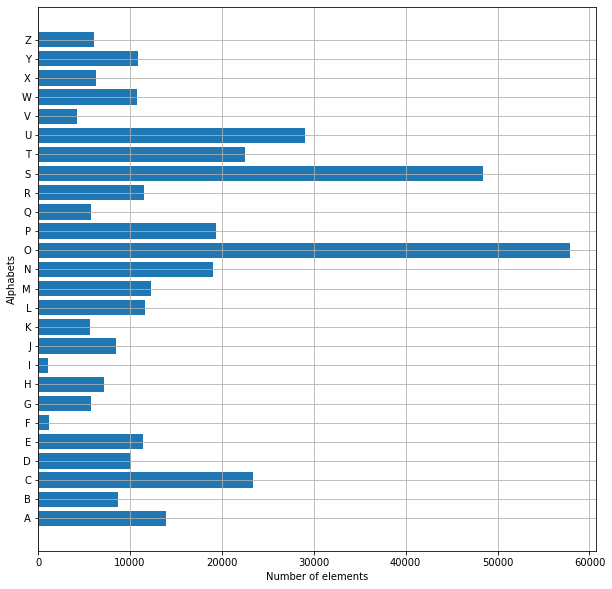

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype = 'int')

for i in y_int:
    count[i] += 1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

**Converting into images**


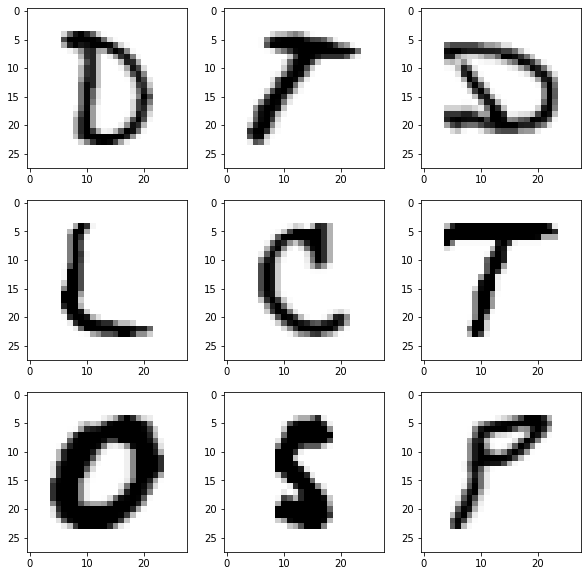

In [ ]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize = (10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1) #Adding the dimension of each pixel to supply into the neural network
print(f"New shape of train data:{train_X.shape}")

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
print(f"New shape of test data:{test_X.shape}")

New shape of train data:(297960, 28, 28, 1)
New shape of test data:(74490, 28, 28, 1)


In [ ]:
train_y_cat = to_categorical(train_y, num_classes=26, dtype='int')
print(f"New shape of train labels:{train_y_cat.shape}")

test_y_cat = to_categorical(test_y, num_classes=26, dtype='int')
print(f"New shape of test labels:{test_y_cat.shape}")

New shape of train labels:(297960, 26)
New shape of test labels:(74490, 26)


**Building the Neural Network**

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_y_cat, epochs=2, validation_data = (test_X,test_y_cat))

Epoch 1/2
9312/9312 [==============================] - 398s 43ms/step - loss: 0.1552 - accuracy: 0.9577 - val_loss: 0.0807 - val_accuracy: 0.9784
Epoch 2/2
9312/9312 [==============================] - 393s 42ms/step - loss: 0.0716 - accuracy: 0.9800 - val_loss: 0.0648 - val_accuracy: 0.9833


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

**Prediction Using test set**


In [ ]:
pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


In [ ]:
print(f"The validation accuracy is :{history.history['val_accuracy']}")
print(f"The training accuracy is :{history.history['accuracy']}")
print(f"The validation loss is :{history.history['val_loss']}")
print(f"The training loss is :{history.history['loss']}")

The validation accuracy is :[0.9783863425254822, 0.983272910118103]
The training accuracy is :[0.9577057361602783, 0.9800476431846619]
The validation loss is :[0.08065083622932434, 0.06477957963943481]
The training loss is :[0.15517066419124603, 0.07163330167531967]


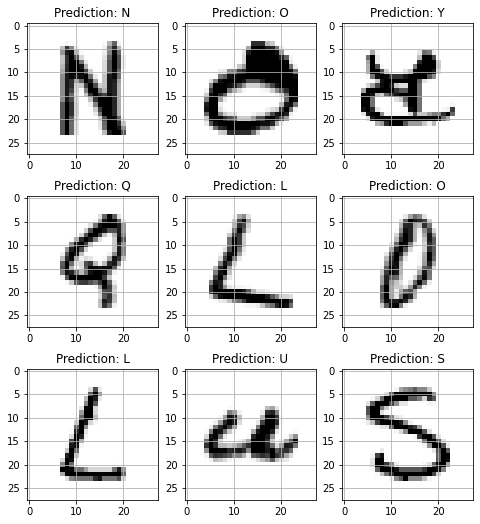

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_y_cat[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

**Prediction using an external image**

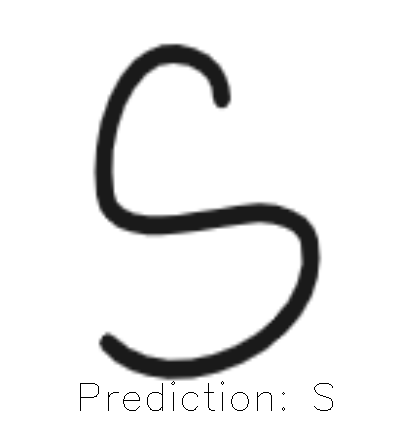

In [ ]:
img = cv2.imread('s.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0) #Noise reduction
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Prediction: " + img_pred, (75,410), cv2.FONT_HERSHEY_SIMPLEX, 1.3, color = (0,0,0))
cv2_imshow(img)